In [304]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [388]:
class model(object):
    def __init__(self, x0, t, v, A, L):
        self.x0 = x0
        self.t = t
        self.v = v
        self.A = A
        self.L = L
        
    def calc_grad(self, Iter):
        A = self.A
        v = self.v
        x = self.rates[Iter,:]
        pre_grad = self.grad[Iter,:,:]
        for i in range(A.shape[0]):
            j = 1-i
            a = pre_grad[i,i] * (1 + A[i,i]*v[i]**2 *(1 - 2*x[i]) - A[i,j]*v[i]*v[j]*x[j])
            b = pre_grad[i,j] * A[i,j]*v[i]*v[j]*(1-x[i])
            c = 2*A[i,j]*v[i]*x[i] - 2*A[i,i]*v[i]*x[i]**2 + A[i,j]*v[j]*x[j] - A[i,j]*v[j]*x[i]*x[j]
            self.grad[Iter, i, i] = a+b+c
            a = pre_grad[i,j] * (1 + A[i,i]*v[i]**2 *(1 - 2*x[i]) - A[i,j]*v[i]*v[j]*x[j])
            b = pre_grad[i,i]*A[i,j]*v[i]*v[j]*(1-x[i])
            c = A[i,j]*v[i]*x[i] - A[i,j]*v[i]*x[i]*x[j]
            self.grad[Iter, i, j] = a+b+c

    def iterate(self, Iter):
        self.rates[Iter,:] = self.x0
        self.grad[Iter,:,:] = 0
        for i in range(1,self.t+1):
            self.rates[Iter,:] = self.rates[Iter,:] + self.v*(1-self.rates[Iter,:])*(np.sum(self.A*self.v*self.rates[Iter,:], axis=1))
            self.calc_grad(Iter)
        self.cost[Iter,:] = self.rates[Iter,:]*self.L + 1/self.v - 1
        self.f_grad[Iter, :] = np.diag(self.grad[Iter,:,:])*self.L - 1/(self.v**2)
        
    def train(self, lr, Iter):
        self.rates = np.zeros((Iter, x0.shape[0]))
        self.grad = np.zeros((Iter, A.shape[0], A.shape[1]))
        self.f_grad = np.zeros((Iter, A.shape[0]))
        self.cost = np.zeros((Iter, A.shape[0]))
        for i in tqdm.tqdm(range(Iter)):
            self.iterate(i)
            self.v = self.v - lr*(self.f_grad[i,:])
            self.v[self.v==0] = 1/np.exp(10)
    

In [389]:
x0 = np.array([0.0001,0.1])
t = 150
v = np.array([0.3,0.4])
A = np.array([[0.1,0.2],[0.3,0.1]])
beta = 0.1
A = A*beta
L = np.array([0.8, 0.6])
#temp = contagion_rate(x0, t, v, A)

In [390]:
model = model(x0,t,v,A,L)
itr = 50000

In [391]:
model.train(0.00001,itr)
base_v = model.v.copy()
base_cost = model.cost[itr-1].copy()

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [09:28<00:00, 87.91it/s]


[0.86461188 0.76968935]


array([0.59994462, 0.67629418])

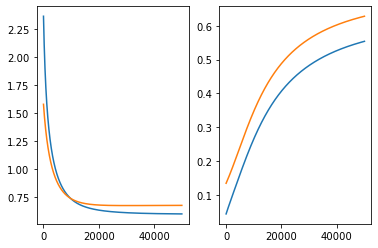

In [392]:
fig, axs = plt.subplots(1,2)
axs[0].plot(range(itr), model.cost, label='Cost')
axs[1].plot(range(itr), model.rates, label='Rate')
print(model.v)
model.cost[itr-1]

In [352]:
epsilon = np.array([0,0.1])
up_v = base_v + epsilon
down_v = base_v - epsilon
model.v = up_v
model.iterate(299)

In [353]:
print(model.cost[itr-1])
print(model.f_grad[itr-1])

[2.98645219 2.06507649]
[-8.38127139 -3.93383085]


In [338]:
2000%1000

0

In [ ]:
def grad_ii(c_rate, t, v, A, i):
    if t == 0:
        return c_rate[0, i]
    j = 1-i
    a = grad_ii(c_rate, t-1, v, A, i) * (1 + A[i,i]*v[i]**2 *(1 - 2*c_rate[t,i]) - A[i,j]*v[i]*v[j]*c_rate[t,j])
    b = grad_ij(c_rate, t-1, v, A, j) * A[i,j]*v[i]*v[j](1-c_rate[t,i])
    c = 2*A[i,j]*v[i]c_rate[t,i] - 2*A[i,i]*v[i]*c_rate[t,i]**2 + A[i,j]*v[j]*c_rate[t,j] - A[i,j]*v[j]*c_rate[t,i]*c_rate[t,j]
    grad = a+b+c
    return grad

def graf_ij(c_rate, t, v, A, i):
    if t == 0:
        return c_rate[0, i]
    j = 1-i
    a = grad_ij(c_rate, t-1, v, A, i) * (1 + A[i,i]*v[i]**2 *(1 - 2*c_rate[t,i]) - A[i,j]*v[i]*v[j]*c_rate[t,j])
    b = grad_ii(c_rate, t-1, v, A, j)*A[i,j]*v[i]*v[j](1-c_rate[t,i])
    c = A[i,j]*v[i]c_rate[t,i] - A[i,j]*v[i]*c_rate[t,i]*c_rate[t,j]
    grad = a+b+c
    return grad
        

In [17]:
class model(object):
    def __init__(self, x0, t, v, A):
        self.x0 = x0
        self.t = t
        self.v = v
        self.A = A
        self.rates = np.zeros((t+1, x0.shape[0]))
        self.grad = np.zeros((t+1, A.shape[0], A.shape[1]))
    '''        
    def rec_grad_ii(self, c_rate, t, v, A, i):
        j = 1-i
        if t == 0:
            grad = c_rate[0, i]
        else:
            a = rec_grad_ii(c_rate, t-1, v, A, i) * (1 + A[i,i]*v[i]**2 *(1 - 2*c_rate[t,i]) - A[i,j]*v[i]*v[j]*c_rate[t,j])
            b = rec_grad_ij(c_rate, t-1, v, A, j) * A[i,j]*v[i]*v[j](1-c_rate[t,i])
            c = 2*A[i,j]*v[i]c_rate[t,i] - 2*A[i,i]*v[i]*c_rate[t,i]**2 + A[i,j]*v[j]*c_rate[t,j] - A[i,j]*v[j]*c_rate[t,i]*c_rate[t,j]
            grad = a+b+c
        self.grad[t,i,]
        return grad

    def rec_graf_ij(self ,c_rate, t, v, A, i):
        if t == 0:
            return c_rate[0, i]
        j = 1-i
        a = rec_grad_ij(c_rate, t-1, v, A, i) * (1 + A[i,i]*v[i]**2 *(1 - 2*c_rate[t,i]) - A[i,j]*v[i]*v[j]*c_rate[t,j])
        b = rec_grad_ii(c_rate, t-1, v, A, j)*A[i,j]*v[i]*v[j](1-c_rate[t,i])
        c = A[i,j]*v[i]c_rate[t,i] - A[i,j]*v[i]*c_rate[t,i]*c_rate[t,j]
        grad = a+b+c
        return grad
    '''    
    def calc_grad(self, t):
        A = self.A
        v = self.v
        x = self.rates[t,:]
        pre_grad = self.grad[t-1,:,:]
        for i in range(A.shape[0]):
            j = 1-i
            a = pre_grad[i,i] * (1 + A[i,i]*v[i]**2 *(1 - 2*x[i]) - A[i,j]*v[i]*v[j]*x[j])
            b = pre_grad[i,j] * A[i,j]*v[i]*v[j]*(1-x[i])
            c = 2*A[i,j]*v[i]*x[i] - 2*A[i,i]*v[i]*x[i]**2 + A[i,j]*v[j]*x[j] - A[i,j]*v[j]*x[i]*x[j]
            self.grad[t, i, i] = a+b+c
            a = pre_grad[i,j] * (1 + A[i,i]*v[i]**2 *(1 - 2*x[i]) - A[i,j]*v[i]*v[j]*x[j])
            b = pre_grad[i,i]*A[i,j]*v[i]*v[j]*(1-x[i])
            c = A[i,j]*v[i]*x[i] - A[i,j]*v[i]*x[i]*x[j]
            self.grad[t, i, j] = a+b+c
        self.v[self.v==0] = 1/np.exp(10)
        self.f_grad = np.diag(self.grad[t]) + 1/self.v-1

    def iterate(self):
        self.rates[0,:] = self.x0
        self.grad[0,:,:] = 0
        print(self.v)
        for i in range(1,t+1):
            self.rates[i,:] = self.rates[i-1,:] + self.v*(1-self.rates[i-1,:])*(np.sum(self.A*self.v*self.rates[i-1,:], axis=1))
            self.calc_grad(i)
            
    def train(self, lr, i):
        for j in range(i):
            self.iterate()
            self.v = self.v - lr*(self.f_grad)
    
        

fig, axs = plt.subplots(1,2)
axs[0].plot(range(300), model.cost, label='Cost')
axs[1].plot(range(300), model.rates, label='Rate')
base_v = model.v

In [22]:
def func(i):
    for j in range(i):
        test = test + [i]

In [16]:
np.exp(5)

148.4131591025766